# Cloud Classifier 
We will cultivate an image dataset of **cloud types** from the internet and train a CNN to identify them using the fastai library. I personally have a hard time identifying clouds and I think this tool would help me learn more about them. Additionally, I think it would be a good candidate for a camera-based phone app. <br>




# Method
We will first build a dataset of cloud images. We will find images by downloading according to the 10 cloud types.<br>

To do this we will use the **google_images_download** technique. <br>
https://github.com/hardikvasa/google-images-download


# Local machine install and download
This is first done on the local machine to test the technique in a familiar environment (Ubuntu 18.04). <br>
I installed chrome, and I downloaded chromedriver and placed it in ~/bin/chromedriver/chromedriver <br>

Then I installed google_images_download by typing: <br>
$ pip install google_images_download <br>

Which now resides in ~/anaconda3/bin/ <br>

Then I made a config file in the form of a JSON which contained the search query and the number of images requested as specified in the documentation. <br>

I then executed the line: <br>

$ googleimagedownload -cf ~/GoogleDrive/clouds/config/clouds_config.JSON -cd ~/bin/chromedriver/chromedriver <br>

and the images were downloaded. <br>

However, requesting more than 99 images in the JSON caused an error. Thus it worked better to execute a seperate command per query, such as: <br>

$ googleimagesdownload -k "altocumulus clouds" -l 500 -cd ~/bin/chromedriver/chromedriver


# Server install and download
I also want to try to get this working on the server. So I show the steps here.

In [0]:
! cd ~/
!wget --header="Host: chromedriver.storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,nl-NL;q=0.8,nl;q=0.7,de;q=0.6" --header="Referer: https://chromedriver.storage.googleapis.com/index.html?path=74.0.3729.6/" "https://chromedriver.storage.googleapis.com/74.0.3729.6/chromedriver_linux64.zip" -O "chromedriver_linux64.zip" -c
!wget --header="Host: dl.google.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,nl-NL;q=0.8,nl;q=0.7,de;q=0.6" --header="Referer: https://www.google.com/chrome/" --header="Cookie: SID=egcaYJZ81Z4z2VofLfQElkPrEyjWmm6eakIywsbcmUPPVNiWGIv8jznnyDgBLb8R6mSbZQ.; HSID=A4hqvWw3zPtVWK78F; SSID=AY0t-oqYcu7Q6QIRy; APISID=FM_k9_ZmsS7CTjQ7/A2b2vTMyMtA2-Xdx6; SAPISID=PPjuKwEWVtF_dPsU/ABUalMAyjFA6Z3CJo; ANID=AHWqTUmK6ZKtxJsmA1gcuNKtGlTwvWsIgwDqwq8aKb-5Su9OM7EXFWsA76nvyK1T; NID=185=4XqNgqlrv-ilJNCZL8wW6aOxsU3waBY5gG4asQYjZCw4bJLcab5FCDkbf_g2HqjbCmaofyN8MZDAGa_os7moI3rK3j3zGItfkE2bN0PuRcx4erDFCtds2kEjMKObVLrHhGxJw6NPhJprQjSoRuLgi_OJKGFXxarsFfYAKVl7yMWUpWuCy5qQA5Hi0B3JSM77TZKFKsJW-Usaxl2csHGjnGzp4DobGKFtD8Va5lAkj_EFj5KHOG8pzY54yaVcU5-regsfvyAAaXuRog; 1P_JAR=2019-6-4-21; SIDCC=AN0-TYup46Ld8ZE8Pv-q77jGzuWu6G_jlJgqcQ0f5FFuOiXJM4DN6HOF07-OPjzxfiG75-uNIug" --header="Connection: keep-alive" "https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb" -O "google-chrome-stable_current_amd64.deb" -c


Now we will try to download images using the command line:



In [0]:
! googleimagesdownload -k "altocumulus clouds" -l 500 -cd ~/chromedriver


This does not work as it did before on the local machine. Try not including a limit.

In [0]:
! cd ../content/gdrive/'My Drive'/clouds/
! googleimagesdownload -k "altocumulus clouds" -cd ~/chromedriver

So there is some issue with the limits and going above 100 images. This is likely not sufficient to develop a dataset. <br> On my local machine requests for 500 images worked if a config file was not used, leading us to the final approach.



# Final approach - local download to Google Drive
The final approach is that I write a shell script which has the following content: <br>

!/bin/bash <br>
export PATH=$PATH:~/anaconda3/bin/ <br>
googleimagesdownload -k "cirrocumulus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "cirrus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "cirrostratus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "altocumulus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "altostratus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "stratus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "cumulus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "stratocumulus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "nimbostratus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>
googleimagesdownload -k "cumulonimbus clouds" -cd ~/bin/chromedriver/chromedriver -l 500 <br>

and the images are thereafter synced to Google Drive.




# Image visualization
After waiting some time for the images to sync, we can visualize some images that we have downloaded using the shell script.

In [4]:
from fastai.vision import *
from os import listdir
from PIL import Image as PImage
import os

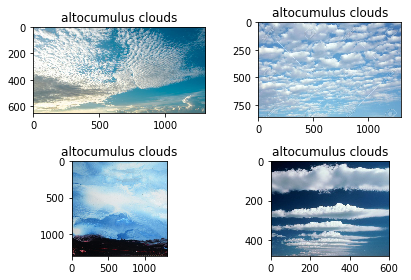

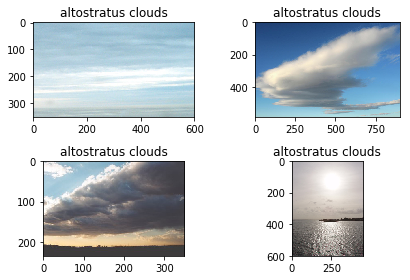

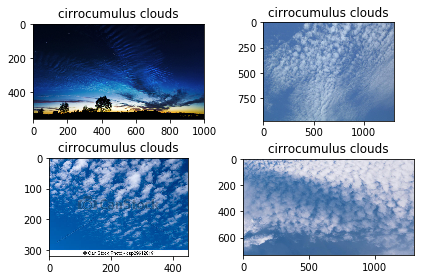

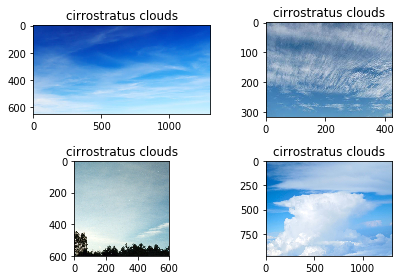

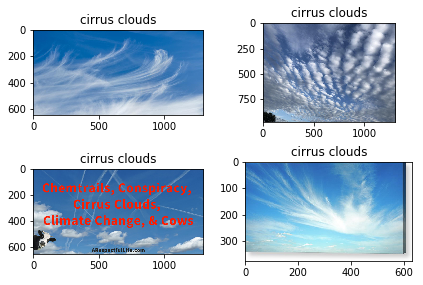

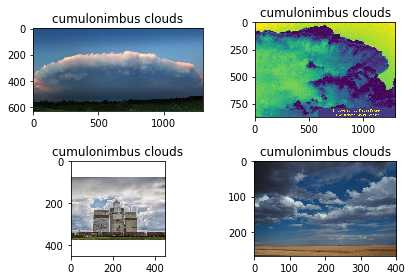

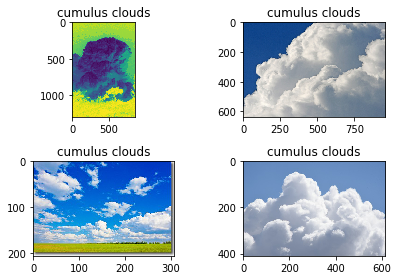

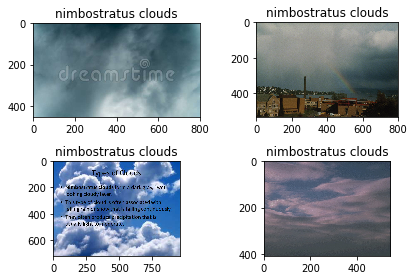

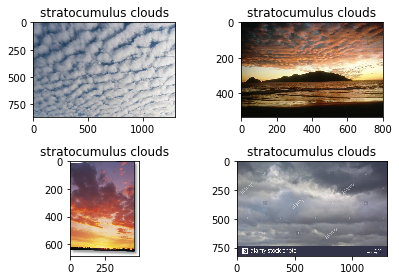

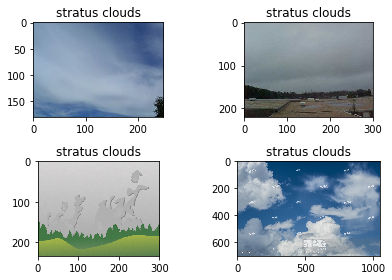

In [12]:
root = os.getcwd()
path_img = '..\\data\\clouds\\'
for cind, cloud_type in enumerate(listdir(path_img)):
  fnames = get_image_files(path_img + cloud_type + '/')
  for pic in range(0,4):
    plt.figure(cind)
    plt.subplot(2,2,pic+1)
    plt.title(cloud_type)
    img = PImage.open(fnames[pic])
    plt.imshow(img)
  plt.tight_layout()

# Training for 10 classes without cleaning
We will now try to train a network without any cleaning step. We will however check for valid files and get rid of those images that cannot be opened.

In [13]:
for cloud_type in listdir(path_img):
  verify_images(path_img + '/' + cloud_type, delete = True, max_size = 1300)

FileNotFoundError: [Errno 2] The system cannot find the path specified: '..\\data\\clouds\\altocumulus clouds\\254.graphicstock-classic-altocumulus-middle-layer-altocumulus-clouds-display-the-banded-puffs-typical-of-this-cloud-type-these-clouds-are-composed-of-water-droplets-probably-supercooled_HGzg4rrt2e_SB_PM.jpg'

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_img, train = ".", valid_pct = 0.2,
                                  ds_tfms = get_transforms(), size = 224, num_workers = 0).normalize(imagenet_stats)

In [ ]:
data.classes, len(data.train_ds)

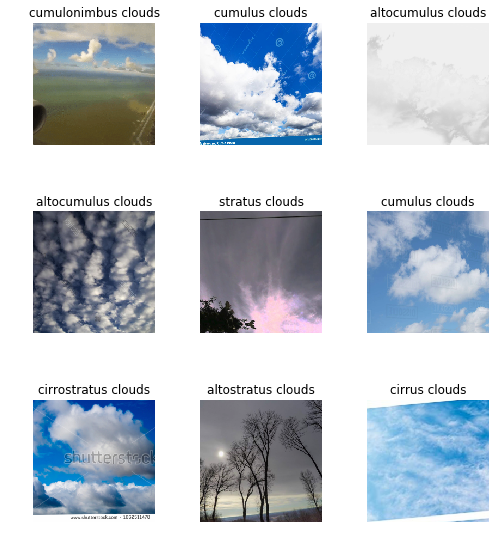

In [8]:
data.show_batch(rows = 3, figsize = (7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['altocumulus clouds',
  'altostratus clouds',
  'cirrocumulus clouds',
  'cirrostratus clouds',
  'cirrus clouds',
  'cumulonimbus clouds',
  'cumulus clouds',
  'nimbostratus clouds',
  'stratocumulus clouds',
  'stratus clouds'],
 10,
 3257,
 814)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Rudy/.torch\models\resnet34-333f7ec4.pth
87306240it [00:17, 4976415.96it/s]


In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [0]:
learn.save('state-1')

In [0]:
learn.unfreeze()

In [0]:
#learn.lr_find()

In [0]:
#learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr = slice(1e-4, 1e-3))

In [0]:
learn.save('state-2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

We see that after 9 epochs we have an accuracy of ~80%. Maybe this can be improved with some cleaning of the data.

# Training for 5 classes with cleaning
We identify that the problem is challenging because an aspect of distinction between some types is altitude, which is not (easily) discernable from images. There are errors between types that are predominately distiguished by altitude of formation. It might now be an idea to lump the 10 classes into 5 classes that are based solely on form-type (5 classes) and not type (10 classes) . <br>

Additionally, we have not yet checked for obviously useless images, so we will also look for these and delete them where possible. We will first do this since we already have the top losses available from the previous training.

In [0]:
import os 
import glob
import shutil
from fastai.widgets import *

Now let's examine some of the top losses and delete them manually. <br>
**this does not complete**


In [0]:
#ImageCleaner(ds, idxs, path_img)

Now copy photos into lumped form-type folders to make 5 classes from 10 classes

In [0]:
# cloud types based on form ignoring altitude
cloud_types = {'stratiform'      : ['cirrostratus', 'altostratus', 'stratus', 'nimbostratus'],
              'cirriform'        : ['cirrus'],
              'stratocumuliform' : ['cirrocumulus', 'altocumulus', 'stratocumulus'],
              'cumuliform'       : ['cumulus'],
              'cumulonimbiform'  : ['cumulonimbus']}

In [0]:
cd ~/

In [0]:
cd ../content/gdrive/'My Drive'/clouds/

In [0]:
mkdir merged

In [0]:
cd merged

Because the **ImageCleaner** widget did not work, I have manually deleted erroneous images from the merged database folder. Thus, we do not want to overwrite these manual changes if the raw database was already created during a form-type merge/copy.

In [0]:
make_db = False

if make_db:
  for cloud_type in cloud_types.keys():
    if not os.path.exists(cloud_type):
      os.mkdirs(cloud_type)
    for sub_type in cloud_types[cloud_type]:
      print(sub_type)
      for pic in glob.glob(path_img + sub_type + ' clouds/*'):
        shutil.copy(pic, os.getcwd() + '/' + cloud_type + '/')

We should now have a new set of folders with clouds lumped according to form-type only. We can create a new databunch from these folders and end up with 5 classes instead of 10. These should hopedully be easier for the CNN to distinguish.

In [0]:
path_img = os.getcwd()
data_cleaned = ImageDataBunch.from_folder(path_img, train = ".", valid_pct = 0.2,
               ds_tfms = get_transforms(), size = 224, num_workers = 0).normalize(imagenet_stats)

Here I would like to plot a histogram of the number of observations per class, but there does not seem to be a good way to do this form a DataBunch... <br>
This was not helpful: https://forums.fast.ai/t/imagedatabunch-histogram-of-class-distribution/47188

In [0]:
data_cleaned


NameError: ignored

Apparently cumulonimbiform did not make it, it is in the classes, but there are no observations... It has very few images. The image copy resulted in only a few images. Maybe it has to do with so many of them being corrupted? I think they were deleted in the **verify_images** call.

In [0]:
# cannot load a network that was trained on more classes than we are currently using
# learn_cln.load('state-2');
# learn_cln.unfreeze()

learn_cln = cnn_learner(data_cleaned, models.resnet34, metrics = error_rate)
learn_cln.fit_one_cycle(1, max_lr = slice(1e-4, 1e-3))

In [0]:
learn_cln.unfreeze()

In [0]:
learn_cln.fit_one_cycle(3, max_lr = slice(1e-4, 1e-3))

In [0]:
 learn_cln.save('state-3')

In [0]:
learn_cln.fit_one_cycle(3, max_lr = slice(1e-4, 1e-3))

In [0]:
 learn_cln.save('state-4')

In [0]:
learn_cln.fit_one_cycle(3, max_lr = slice(1e-4, 1e-3))

In [0]:
 learn_cln.save('state-5')

In [0]:
learn_cln.fit_one_cycle(3, max_lr = slice(1e-4, 1e-3))

So the accuracy was slightly improved and stands at approx 84%. <br>
It actually looks like we have some overfitting! This is examplified by the fact that the validation loss is a lot higher than the training loss. Perhaps we should have stopped after 2 instead of 3 epochs. I think the neural net would benefit greatly from some manual dataset pruning.





In [0]:
learn_cln.save('state-6')

#Prediction
Now let's do a prediction

In [0]:
learn_cln.export()

In [0]:
learn_cln.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn_cln)
interp.plot_confusion_matrix()

Here I choose a random image from the dataset.

In [0]:
path_img = '/content/gdrive/My Drive/clouds/downloads/'
img = open_image(path_img + 'stratocumulus clouds' + '/' + '5.15284191-stratocumulus-clouds-over-sky-during-summer-morning.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn_cln.predict(img)
pred_class

This is correct! But, it was also part of the training/test set, so it is not that good of a test.

# Biggest challenges
* duplicates
* inproper classification
* watermarks
* artistic impressions
* poor balance between classes